# Project

# Data

The dataset<sup><a name="note-cariboo" href="#cariboo">[7]</a></sup> is composed of 7 different subsets, we will be using 4 of the datasets. Since each feature resides in different sets. 

- `Appearances.csv`
    - Player ID, Game ID, Appearance ID, Competition ID, Player club ID, Assist, Minutes Played, Yellow cards, Red Cards
- `Clubs.csv `
    - Club ID, Name, Pretty_name, Domestic_competition_id, Total_market_value, Squad_size, Average_age, Foreigners_numbers, Foreigners_percentage, National_team_players, Stadium_name, Stadium_seats, Net_transfer_record, Coach_name, URL
- `Competitions.csv`
    - Competition_id, Name, type, country_id, country_name, domestic_league_code, confederation, URL.  
- `Games.csv` 
    - Game_id, Competition_code, Season, Round, Date, Home_club_id, Away_club_id, Home_club_goals, away_club_goals, Home_club_postions, Away_club_postion, Stadium, Attendance, Referee, URL 
- `Leagues.csv` 
    - League_id, name, Confederation
- `Player_valuations.csv` 
    - Player_id, Date, Market_value
- `Players.csv`
    - Player_id, Last_season, Current_club_id, Name, Pretty_name, country_of_birth, Country_of_citizenship, Date_of_birth, Position, Sub_position, Foot, Height_in_cm, Market_value_in_gbp, Highest_market_value_in_gbp, URL

- _What an observation consists of_: We are trying to use the variables we assume to be the most important and independent from each other. We decided on 
    - Club, Nationality, League, Appearances, Minutes, Goals, Assist, Age, Conduct, Media Presence, Years Played, Trophies, Experience, Position, Physicality, Potential. 
- _What some critical variables are, how they are represented_: We want variables which have the highest co-variance with each other. The metric should handle most features as unique features. 
- _Any special handling, transformations, cleaning, etc will be needed_: There will be club names, and probably inferences in our data. Such as Media Presence or Potential, these are metrics which can be objective to the person. How popular is the player that we are analyzing? 

We are still going to be in search of more databases that might have different descriptive data that we might like to see how organizations search for talent. We can use what they might describe as their most sought out characteristics. 

For Simplicity we can also assume that all players have no contracts for their evaluation and are based solely on performance and the other variables mentioned.

In [1]:
!{__import__('sys').executable} -m pip install --quiet pandas

In [2]:
import pandas as pd

_data_ = {
    name: pd.read_csv(
        file, 
        engine = 'c',
        low_memory = True,
        memory_map = False, # set `False` to load into memory
        **kwargs
    ) for name, file, kwargs in [
        ('appearances', 'data/appearances.csv', {}),
        ('clubs', 'data/clubs.csv', {}),
        ('competitions', 'data/competitions.csv', {}),
        ('games', 'data/games.csv', {}),
        ('leagues', 'data/leagues.csv', {}),
        ('players', 'data/players.csv', {
            'parse_dates': ['date_of_birth'],
            'dtype': {
                'last_season': 'category',
                'country_of_birth': 'category',
                'country_of_citizenship': 'category',
                'position': 'category',
                'sub_position': 'category'
            }
        }),
        ('player_valuations', 'data/player_valuations.csv', {})
    ]
}

In [3]:
data = {}

In [4]:
data['clubs'] = _data_['clubs'].copy()

data['clubs'] = data['clubs'][['club_id', 'name']]
data['clubs'].rename(
    columns = {'name': 'club_name'},
    inplace = True
)
data['clubs'].set_index('club_id', inplace = True)

data['clubs']

club_name
club_id                             
1032                      fc-reading
2323                        orduspor
1387                  acn-siena-1904
3592              kryvbas-kryvyi-rig
1071                  wigan-athletic
...                              ...
1269                      pec-zwolle
200                       fc-utrecht
317               fc-twente-enschede
3948     royale-union-saint-gilloise
1304                 heracles-almelo

[400 rows x 1 columns]

In [5]:
data['games'] = _data_['games'].copy()

data['games'] = data['games'][[
    'season', 
    'game_id', 
    'home_club_id', 
    'away_club_id'
]]
data['games'].set_index('game_id', inplace = True)

data['games']

season  home_club_id  away_club_id
game_id                                    
2244388    2012           131           418
2219794    2011            58           498
2244389    2012           418           131
2271112    2012            48            60
2229332    2012            27            16
...         ...           ...           ...
3646190    2021         84351          1053
3646188    2021          5791         20108
3655616    2021          5874         12275
3655629    2021         20361           206
3646191    2021         22235          5892

[56028 rows x 3 columns]

In [6]:
_data_['appearances']

player_id    game_id   appearance_id competition_id  player_club_id  \
0            52453  2483937.0   2483937_52453            RU1           28095   
1            67064  2479929.0   2479929_67064            RU1           28095   
2            67064  2483937.0   2483937_67064            RU1           28095   
3            67064  2484582.0   2484582_67064            RU1           28095   
4            67064  2485965.0   2485965_67064            RU1           28095   
...            ...        ...             ...            ...             ...   
1040206     408574  3690094.0  3690094_408574            NLP             306   
1040207     408574  3733611.0  3733611_408574            NLP             383   
1040208     408574  3736633.0  3736633_408574            NLP             383   
1040209     408574  3761904.0  3761904_408574            NLP             383   
1040210     408574  3761906.0  3761906_408574            NLP             383   

         goals  assists  minutes_played  yellow_cards  red_cards  
0            0        0              90             0          0  
1            0        0              90             0          0  
2            0        0              90             0          0  
3            0        0              55             0          0  
4            0        0              90             0          0  
...        ...      ...             ...           ...        ...  
1040206      1        0              90             0          0  
1040207      1        1              90             0          0  
1040208      0        1              27             0          0  
1040209      1        0              90             0          0  
1040210      0        0              69             0          0  

[1040211 rows x 10 columns]

In [7]:
data['appearances'] = _data_['appearances'].copy()

data['appearances'] = data['appearances'].loc[
    :, ~data['appearances'].columns.isin([
        'appearance_id', 
        'competition_id'
    ])
]
data['appearances'].rename(
    columns = {'player_club_id': 'club_id'},
    inplace = True
)

data['appearances'] = data['appearances'].merge(
    data['games'], 
    on = 'game_id',
    copy = False
)
data['appearances'].drop(columns = 'game_id', inplace = True)

data['appearances'] = (
    data['appearances']
        .groupby(['player_id', 'season'])
        .agg({
            **{
                c: 'sum' for c in [
                    'goals', 
                    'assists', 
                    'minutes_played', 
                    'yellow_cards', 
                    'red_cards'
                ]
            },
            'club_id': 'last'
        })
)

data['appearances'].reset_index('season', inplace = True)

data['appearances']

season  goals  assists  minutes_played  yellow_cards  red_cards  \
player_id                                                                    
10           2014     16        9            2289             6          0   
10           2015      8        7            1714             3          0   
26           2014      0        0            2880             0          0   
26           2015      0        0            1260             1          0   
26           2016      0        0            1020             0          0   
...           ...    ...      ...             ...           ...        ...   
926954       2021      0        0              24             1          0   
926987       2021      0        0               3             0          0   
934034       2021      0        0               3             0          0   
971613       2021      0        0              11             0          0   
987700       2021      0        0              71             0          0   

           club_id  
player_id           
10             398  
10             398  
26              16  
26              16  
26              16  
...            ...  
926954        2778  
926987        1053  
934034       60949  
971613         370  
987700       16704  

[55516 rows x 7 columns]

In [8]:
data['player_valuations'] = _data_['player_valuations'].copy()

data['player_valuations']['season'] = \
    pd.DatetimeIndex(data['player_valuations']['date']).year
data['player_valuations'].drop(columns = 'date', inplace = True)

data['player_valuations'] = (
    data['player_valuations']
        .groupby(['player_id', 'season'])
        .agg({'market_value': 'mean'})
)
data['player_valuations'].reset_index('season', inplace = True)

data['player_valuations'].rename(
    columns = {'market_value_in_gbp': 'market_value'},
    inplace = True
)

data['player_valuations']

season  market_value
player_id                      
10           2004     6300000.0
10           2005    10800000.0
10           2006    22500000.0
10           2007    20700000.0
10           2008    18000000.0
...           ...           ...
928831       2021       45000.0
928831       2022       45000.0
934034       2021       45000.0
982344       2022       45000.0
987700       2022       45000.0

[181182 rows x 2 columns]

In [9]:
data['players'] = _data_['players'].copy()

data['players'] = data['players'].loc[
    :, ~data['players'].columns.isin([
        'last_season',
        'pretty_name',
        'current_club_id',
        'market_value_in_gbp',
        'highest_market_value_in_gbp',
        'country_of_birth',
        'url', 
        'foot'
    ])
]
data['players'].rename(
    columns = {
        'height_in_cm': 'height',
        'country_of_citizenship': 'nationality'
    },
    inplace = True
)

data['players'].set_index('player_id', inplace = True)

data['players']

name    nationality date_of_birth    position  \
player_id                                                               
254016      arthur-delalande         France    1992-05-18    Midfield   
51053          daniel-davari           Iran    1988-01-06  Goalkeeper   
31451          torsten-oehrl        Germany    1986-01-07      Attack   
44622      vladimir-kisenkov         Russia    1981-10-08    Defender   
30802             oscar-diaz          Spain    1984-04-24      Attack   
...                      ...            ...           ...         ...   
462285     fabian-de-keijzer    Netherlands    2000-05-10  Goalkeeper   
368612      merveille-bokadi       DR Congo    1996-05-21    Defender   
408574          joey-veerman    Netherlands    1998-11-19    Midfield   
364245           jordan-teze    Netherlands    1999-09-30    Defender   
575367       richard-ledezma  United States    2000-09-06      Attack   

                            sub_position  height  
player_id                                         
254016       midfield - Central Midfield     186  
51053                         Goalkeeper     192  
31451            attack - Centre-Forward     192  
44622              Defender - Right-Back     182  
30802            attack - Centre-Forward     183  
...                                  ...     ...  
462285                        Goalkeeper     193  
368612            Defender - Centre-Back     186  
408574       midfield - Central Midfield     185  
364245            Defender - Centre-Back     183  
575367     midfield - Attacking Midfield     174  

[23682 rows x 6 columns]

In [10]:
data['all'] = data['players'].merge(
    data['player_valuations'].merge(
        data['appearances'], 
        on = ['player_id', 'season'],
        copy = False
    ), 
    on = 'player_id',
    copy = False
)
'''
.merge(
    data['clubs'], 
    on = 'club_id',
    copy = False
)
data['all'].drop(columns = 'club_id', inplace = True)
'''

data['all']['age'] = (
    pd.to_datetime(data['all']['season'], format = '%Y', utc = True) 
        - pd.to_datetime(data['all']['date_of_birth'], utc = True)
).astype('timedelta64[Y]')
data['all'].drop(columns = 'date_of_birth', inplace = True)

data['all']

name    nationality    position  \
player_id                                                
9800        artem-milevskyi        Ukraine      Attack   
43084       gaetano-berardi    Switzerland    Defender   
230826     gennaro-acampora          Italy    Midfield   
198087         matteo-ricci          Italy    Midfield   
110689         deniz-mehmet         Turkey  Goalkeeper   
...                     ...            ...         ...   
364245          jordan-teze    Netherlands    Defender   
364245          jordan-teze    Netherlands    Defender   
364245          jordan-teze    Netherlands    Defender   
575367      richard-ledezma  United States      Attack   
575367      richard-ledezma  United States      Attack   

                            sub_position  height  season  market_value  goals  \
player_id                                                                       
9800             attack - Centre-Forward     189    2020       90000.0      0   
43084              Defender - Right-Back     179    2020      360000.0      0   
230826       midfield - Central Midfield     174    2020      360000.0      1   
198087     midfield - Defensive Midfield     176    2020     1530000.0      0   
110689                        Goalkeeper     192    2020       68000.0      0   
...                                  ...     ...     ...           ...    ...   
364245            Defender - Centre-Back     183    2019      420000.0      0   
364245            Defender - Centre-Back     183    2020     1102500.0      0   
364245            Defender - Centre-Back     183    2021     5400000.0      1   
575367     midfield - Attacking Midfield     174    2020      658250.0      0   
575367     midfield - Attacking Midfield     174    2021      765000.0      1   

           assists  minutes_played  yellow_cards  red_cards  club_id   age  
player_id                                                                   
9800             2             618             3          0     6131  34.0  
43084            0             114             0          0      399  31.0  
230826           2             624             2          0     3522  25.0  
198087           3            2440             5          0     3522  25.0  
110689           0             540             0          0     1519  27.0  
...            ...             ...           ...        ...      ...   ...  
364245           0             180             0          0      383  19.0  
364245           1            3747             5          0      383  20.0  
364245           4            2630             6          0      383  21.0  
575367           1             117             1          0      383  19.0  
575367           0              44             0          0      383  20.0  

[51841 rows x 14 columns]

In [11]:
data['all'].dtypes

name                object
nationality       category
position          category
sub_position      category
height               int64
season               int64
market_value       float64
goals                int64
assists              int64
minutes_played       int64
yellow_cards         int64
red_cards            int64
club_id              int64
age                float64
dtype: object

In [12]:
data['all'].describe()

height        season  market_value         goals       assists  \
count  51841.000000  51841.000000  5.184100e+04  51841.000000  51841.000000   
mean     180.774156   2017.368897  3.569469e+06      1.911672      1.451573   
std       17.814441      2.314096  8.201849e+06      3.649821      2.380698   
min        0.000000   2013.000000  9.000000e+03      0.000000      0.000000   
25%      178.000000   2015.000000  3.600000e+05      0.000000      0.000000   
50%      182.000000   2017.000000  9.000000e+05      0.000000      0.000000   
75%      187.000000   2019.000000  3.000000e+06      2.000000      2.000000   
max      206.000000   2021.000000  1.800000e+08     61.000000     31.000000   

       minutes_played  yellow_cards     red_cards       club_id           age  
count    51841.000000  51841.000000  51841.000000  51841.000000  51832.000000  
mean      1380.464690      2.952702      0.070562   3448.541020     24.593822  
std       1054.435695      3.041267      0.269955   7734.976976      4.379751  
min          1.000000      0.000000      0.000000      2.000000     14.000000  
25%        397.000000      0.000000      0.000000    338.000000     21.000000  
50%       1256.000000      2.000000      0.000000    979.000000     24.000000  
75%       2184.000000      5.000000      0.000000   2740.000000     28.000000  
max       5061.000000     23.000000      3.000000  75506.000000     42.000000

In [13]:
#
data['all'][data['all']['name'] == 'lionel-messi']

name nationality position           sub_position  height  \
player_id                                                                     
28003      lionel-messi   Argentina   Attack  attack - Right Winger     169   
28003      lionel-messi   Argentina   Attack  attack - Right Winger     169   
28003      lionel-messi   Argentina   Attack  attack - Right Winger     169   
28003      lionel-messi   Argentina   Attack  attack - Right Winger     169   
28003      lionel-messi   Argentina   Attack  attack - Right Winger     169   
28003      lionel-messi   Argentina   Attack  attack - Right Winger     169   
28003      lionel-messi   Argentina   Attack  attack - Right Winger     169   
28003      lionel-messi   Argentina   Attack  attack - Right Winger     169   

           season  market_value  goals  assists  minutes_played  yellow_cards  \
player_id                                                                       
28003        2014   108000000.0     58       31            5061             6   
28003        2015   108000000.0     41       24            4229             5   
28003        2016   108000000.0     54       20            4452             9   
28003        2017   108000000.0     45       20            4468             7   
28003        2018   156000000.0     51       22            4024             3   
28003        2019   130500000.0     30       25            3631             7   
28003        2020    95400000.0     39       15            4373             6   
28003        2021    66000000.0     11       13            2692             1   

           red_cards  club_id   age  
player_id                            
28003              0      131  26.0  
28003              0      131  27.0  
28003              0      131  28.0  
28003              0      131  29.0  
28003              0      131  30.0  
28003              0      131  31.0  
28003              1      131  32.0  
28003              0      583  33.0

# Evaluation Metrics

We will be using an OLS regression model and the evaluation techniques we are considering are RMSE and Euclidean distance.
A possible evaluation metric we will use is RMSE or Mean Absolute Value of Errors. It is derived by calculating the difference between the estimated and actual value, square those results, then calculate the mean of those results. The formula for RMSE is 

$$
    \text{RMSE} = \sqrt{\frac{\sum_{i = 1}^{N}\left(\text{Predicted}_{i} - \text{Actual}_{i}\right)^{2}}{N}}
$$

# Preliminary results

In [14]:
!{__import__('sys').executable} -m pip install --quiet statsmodels numpy seaborn

In [15]:
# OLS using statsmodels
import statsmodels.api as sm
import numpy as np

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [16]:
# feature selection
X = data['all'][[
    'goals', 
    'assists', 
    'minutes_played', 
    'yellow_cards', 
    'red_cards', 
    'height'
]]
y = data['all']['market_value']

X = sm.add_constant(X)

OLS_model = sm.OLS(y, X).fit()
OLS_model.summary()

# X coeffecients and constant terms for prediction/plot
params = OLS_model.params

print(OLS_model.summary())
print(params)

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     2437.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:15:15   Log-Likelihood:            -8.9242e+05
No. Observations:               51841   AIC:                         1.785e+06
Df Residuals:                   51834   BIC:                         1.785e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.382e+06   3.27e+05     -4.

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [17]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import seaborn as sns

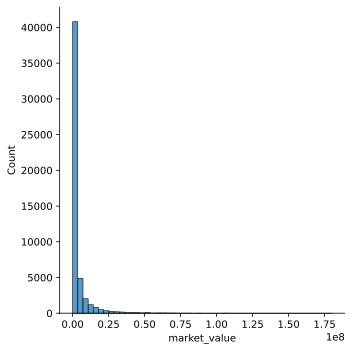

In [18]:
sns.displot(data = data['all'], x = 'market_value', bins = 50)

plt.show()

In [19]:
df_highest_market_value_players = data['all'].nlargest(n = 1, columns = 'market_value')

df_highest_market_value_players

name nationality position             sub_position  \
player_id                                                                
342229     kylian-mbappe      France   Attack  attack - Centre-Forward   

           height  season  market_value  goals  assists  minutes_played  \
player_id                                                                 
342229        178    2019   180000000.0     24       12            2051   

           yellow_cards  red_cards  club_id   age  
player_id                                          
342229                2          0      583  20.0

In [20]:
df_highest_market_value = data['all'].loc[data['all']['name'].isin(df_highest_market_value_players['name'])]

df_highest_market_value

name nationality position             sub_position  \
player_id                                                                
342229     kylian-mbappe      France   Attack  attack - Centre-Forward   
342229     kylian-mbappe      France   Attack  attack - Centre-Forward   
342229     kylian-mbappe      France   Attack  attack - Centre-Forward   
342229     kylian-mbappe      France   Attack  attack - Centre-Forward   
342229     kylian-mbappe      France   Attack  attack - Centre-Forward   
342229     kylian-mbappe      France   Attack  attack - Centre-Forward   
342229     kylian-mbappe      France   Attack  attack - Centre-Forward   

           height  season  market_value  goals  assists  minutes_played  \
player_id                                                                 
342229        178    2015       45000.0      1        2             323   
342229        178    2016     1518750.0     21        8            2108   
342229        178    2017    40500000.0     17       10            2829   
342229        178    2018   138600000.0     37       14            3030   
342229        178    2019   180000000.0     24       12            2051   
342229        178    2020   162000000.0     35       11            3583   
342229        178    2021   144000000.0     31       25            3616   

           yellow_cards  red_cards  club_id   age  
player_id                                          
342229                1          0      162  16.0  
342229                2          0      162  17.0  
342229                3          0      162  18.0  
342229                7          1      583  19.0  
342229                2          0      583  20.0  
342229                6          0      583  21.0  
342229               11          0      583  22.0

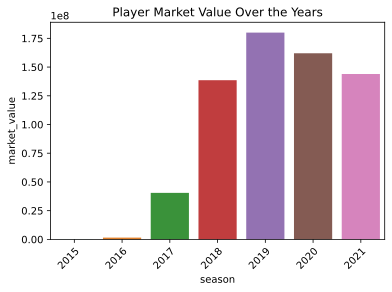

In [21]:
sns.barplot(data = df_highest_market_value, x = 'season', y = 'market_value')
plt.title('Player Market Value Over the Years')
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')

plt.show()

# Footnotes

<sup><a name="cariboo" href="#note-cariboo">7</a></sup> *Football Data from Transfermarkt.* (2022, April 22). [Dataset]. https://www.kaggle.com/datasets/davidcariboo/player-scores